# Notebook SVR : prédictions des métriques des simulations

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

Récupération des données

In [247]:
dataframe = pd.read_csv("resultats/resultats14.csv")

dataframe = dataframe[dataframe['epidemic peak'] > 10] ### tri du dataframe en retirant les cas extremes

Tri des caractéristiques utiles

In [248]:
var = dataframe.columns.drop(['epidemic peak', 'time to extinction','proportion propagation', 'probabilite S -> R', 'probabilite I -> S', 'degre du noeud source', 'dynamique de propagation'])
X = dataframe[var]
Y = dataframe[['epidemic peak']]

In [249]:
X.head(10)

,nombre de noeuds,nombre d'aretes,degre moyen,degre minimal,degre maximal,distance moyenne,nombre de honeypots,nombre de smart honeypots,nombre inf 5,nombre res 5
0,131,374,5.709924,3,10,4.935995,6,0,11,35
1,116,326,5.620690,3,11,4.869115,21,10,11,14
2,116,328,5.655172,3,10,4.737031,24,9,6,7
3,112,318,5.678571,3,10,4.486969,2,0,13,2
4,131,375,5.725191,3,9,4.883500,5,0,14,26
5,137,393,5.737226,3,9,4.929369,28,8,10,20
6,86,240,5.581395,3,10,3.982763,19,4,8,16
7,132,375,5.681818,4,9,5.174416,9,1,11,12
8,119,337,5.663866,3,9,4.704743,4,2,14,20
9,80,225,5.625000,3,9,3.840823,6,1,13,22


Pré-traitement des données : encodage factice

In [250]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [251]:
### prétraitement des données catégorielles (ici le type de propagation)
"""ct = ColumnTransformer([("PropagationType", OneHotEncoder(), [6])], remainder="passthrough", sparse_threshold=0, verbose=True)
X = ct.fit_transform(X)  ### encodage factice"""
sc_x = StandardScaler()
sc_y = StandardScaler()

Division du dataset en 3 ensembles : Train, Test et Validation

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1, shuffle=True)

Pré-traitement des données : normalisation

In [254]:
### normalisation des x
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## SVR

In [255]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'rbf')

In [256]:
svr_lin.fit(x_train, y_train)

c:\Users\yassi\.julia\conda\3\x86_64\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [257]:
from sklearn import metrics
import numpy as np

y_test_pred = svr_lin.predict(x_test)
r2_score = round(metrics.r2_score(y_test, y_test_pred), 2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 2)

print(f"r2 : {r2_score}")
print(f"rmse : {rmse}")

r2 : 0.89
rmse : 9.49


Text(0, 0.5, 'Actual')

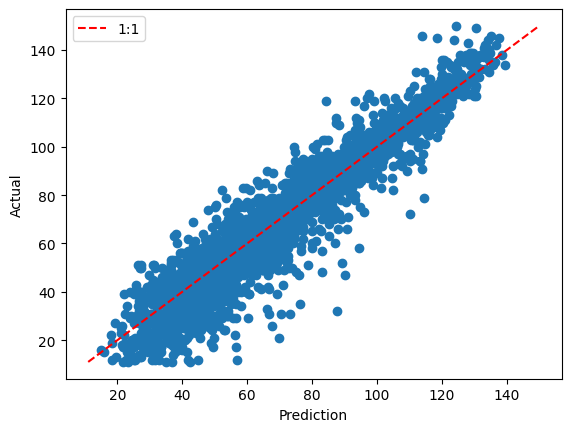

In [258]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(x_test)
min_x = min(np.min(y_test_pred), np.min(y_test))
max_x = max(np.max(y_test_pred), np.max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')